# Matplotlib

## Exercise 1: Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](../assets/births_gender.png)

Note the `1e6` on the y axis for scale

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
%matplotlib inline

In [2]:
# exercise 1
#loading dataset
data = pd.read_csv('../data/births.csv')
df = data.copy()
df.head(10)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


In [3]:
df_g = df.groupby(['year', 'gender']).sum()['births'].reset_index()
df_g

,year,gender,births
0,1969,F,1753634
1,1969,M,1846572
2,1970,F,1819164
3,1970,M,1918636
4,1971,F,1736774
...,...,...,...
75,2006,M,2188268
76,2007,F,2111890
77,2007,M,2212118
78,2008,F,2077929


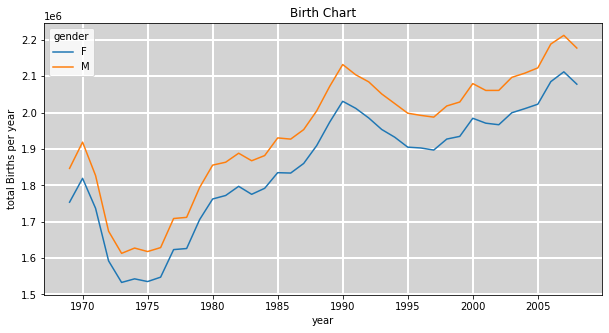

In [4]:
#the plot for the births adjusted by 10^-6 VS. year
plt.figure(figsize=(10, 5))
plt.axes().set_facecolor('lightgray')
sns.lineplot(x ='year', y ='births', data=df_g, hue = 'gender')
plt.grid(color='white', linewidth=2)
plt.ylabel('total Births per year')
plt.title('Birth Chart',loc="center")
plt.show()


## Exercise 2

Reproduce the plot below:

![ex2](../assets/federer.png)

Given the `../data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match.

In [5]:
# exercise 2
data = pd.read_csv('../data/tennis.csv')
df = data.copy()
df.head(3)

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True


In [6]:
#how many value is NaN  
df['player1 double faults'].isna().sum()
#mean value over on the mentioned column 
mean_double_fault = df['player1 double faults'].mean()    # when Mode  is used , the null data is not replace with??!!!
#filling NaN with mean value 
df['player1 double faults'] = df['player1 double faults'].fillna(mean_double_fault)
df['player1 double faults'].isna().sum()

0

In [7]:
#and for 'player1 total points total' as same code as 'player1 double faults' 
df['player1 total points total'].isna().sum()
mean_total_points = df['player1 total points total'].mean()
df['player1 total points total'] = df['player1 total points total'].fillna(mean_total_points)
df['player1 total points total'].isna().sum()

0

In [8]:
df['start date'] = pd.to_datetime(df['start date'])
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [9]:
#choosing few columns in new dataframe for being clear
dfs=df.loc[df['player1 name']=='Roger Federer'].filter([
    'year', 'start date', 'tournament',
    'player1 double faults', 'player1 total points total'])
dfs['total points total per match'] = df[
    'player1 double faults']/df['player1 total points total']
dfs.head(10)

,year,start date,tournament,player1 double faults,player1 total points total,total points total per match
0,1998-01-01,1998-10-05,"Basel, Switzerland",2.000000,103.000000,0.019417
1,1998-01-01,1998-09-28,"Toulouse, France",0.000000,106.000000,0.000000
2,1998-01-01,1998-09-28,"Toulouse, France",3.000000,148.000000,0.020270
3,1998-01-01,1998-09-28,"Toulouse, France",6.000000,130.000000,0.046154
4,1998-01-01,1998-08-24,"Geneva, Switzerland",1.972736,160.726388,0.012274
5,1998-01-01,1998-07-06,"Gstaad, Switzerland",3.000000,136.000000,0.022059
6,1999-01-01,1999-10-25,"Brest, France",1.972736,160.726388,0.012274
7,1999-01-01,1999-10-25,"Brest, France",1.972736,160.726388,0.012274
8,1999-01-01,1999-10-25,"Brest, France",1.972736,160.726388,0.012274
9,1999-01-01,1999-10-25,"Brest, France",1.972736,160.726388,0.012274


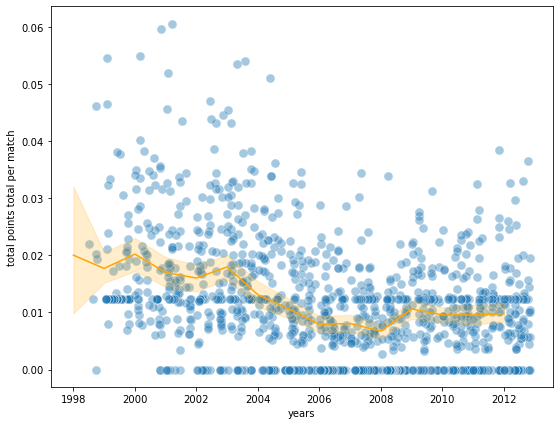

In [10]:
#ploting scatter and line in one plot with total points total contrast
plt.figure(figsize=(9, 7))
sns.scatterplot(x='start date', y ='total points total per match',  data=dfs,
                #hue='player1 total points total',
                palette = sns.color_palette("ch:s=.15,rot=-.25", as_cmap=True), legend=False, alpha=0.4, s=80)
sns.lineplot(x='year', y ='total points total per match',  data=dfs, color= 'orange')
plt.xlabel('years')
plt.ylabel('total points total per match')
plt.show()




## Exercise 3: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [11]:
#for having the options in the surface column
df['surface'].unique()

array(['Indoor: Hard', 'Outdoor: Clay', 'Indoor: Carpet', 'Outdoor: Hard',
       'Outdoor: Grass', 'Indoor: Clay'], dtype=object)

In [12]:
df_surf = df.filter(['surface', 'year', 'player1 double faults'])
df_surf['year'] = pd.to_datetime(df['year'], format='%Y')
df_surf.head()
df_surf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   surface                1179 non-null   object        
 1   year                   1179 non-null   datetime64[ns]
 2   player1 double faults  1179 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB


In [13]:
#defining the x axes (horizantal axes) and the vertical axes as y seperated by evry single surface's options
y1 = df_surf['player1 double faults'].loc[df_surf['surface'] == 'Indoor: Hard']
y2 = df_surf['player1 double faults'].loc[df_surf['surface'] == 'Indoor: Carpet']
y3 = df_surf['player1 double faults'].loc[df_surf['surface'] == 'Indoor: Clay']
y4 = df_surf['player1 double faults'].loc[df_surf['surface'] == 'Outdoor: Hard']
y5 = df_surf['player1 double faults'].loc[df_surf['surface'] == 'Outdoor: Grass']
y6 = df_surf['player1 double faults'].loc[df_surf['surface'] == 'Outdoor: Clay']
x = df_surf['year']


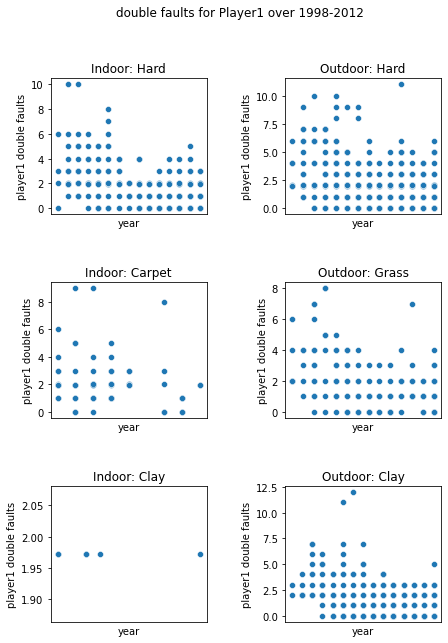

In [14]:
# exercise 3
#n_rows = 4 , n_cols = 2
#plotting each defined y of surface option separately by subplot
fig, axs = plt.subplots(nrows=3, ncols=2,  figsize=(7, 10), gridspec_kw={'wspace':0.5,'hspace':0.5})
sns.scatterplot(data=df_surf, x=x, y=y1, ax=axs[0, 0])
sns.scatterplot(data=df_surf, x=x, y=y2, ax=axs[1, 0])
sns.scatterplot(data=df_surf, x=x, y=y3, ax=axs[2, 0])
sns.scatterplot(data=df_surf, x=x, y=y4, ax=axs[0, 1])
sns.scatterplot(data=df_surf, x=x, y=y5, ax=axs[1, 1])
sns.scatterplot(data=df_surf, x=x, y=y6, ax=axs[2, 1])
axs[0, 0].set(title='Indoor: Hard', xticks=[])
axs[1, 0].set(title='Indoor: Carpet', xticks=[])
axs[2, 0].set(title='Indoor: Clay', xticks=[])
axs[0, 1].set(title='Outdoor: Hard', xticks=[])
axs[1, 1].set(title='Outdoor: Grass', xticks=[])
axs[2, 1].set(title='Outdoor: Clay', xticks=[])
fig.suptitle('double faults for Player1 over 1998-2012')
plt.show()

## Exercise 4: Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

<img src="../assets/births_gp100.png" style="max-width: 600px;" />

**4.1**  Attempt to BRIEFLY explain the three plots in Gelman's figure. 

# exercise 4.1 (explain here)
1)the first half of year(from Jaunary to Jun), births' number is bellow the mean(100 per day)
which the minimum points are in 1st Junaury and 4th July

2)the summer , births surge to maximum number in October(~110 per day)
then falls down to minimum in November. However, minimum births is on 12th December

3)Last week of year has the lowest births in whole the year

4)Based on residual plot, almost the there is a uniform distribution around the mean value which are close to the mean value,except, some outlier data happend on 1st January, 7s July, 12 December with maximum residual as denoted on the figure as a point.

**4.2** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

# exercise 4.2 (explain here)
resudual plot: A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis
    in general, residual is the defferenc between mean and actual data. or between theoritical value and predicted value.
    
component periodic plot:varing data in time, it is important to know what is the trend! or 
    to know it is constantly increasing, decreasing or even falctuating. In this case it has uniform constant flactuation with some falling and rising in the specific period like around "july", 'November" or even the early spring